Graded Project 3 - Python for DS

1. Import required libraries and read the dataset.(2) 

In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score  
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler  ## to Normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [53]:
#reading dataset

df = pd.read_csv('loan_approval_data.csv')
df.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)

In [3]:
df.shape

(614, 13)

In [4]:
df.info

<bound method DataFrame.info of       loan_id  gender married  dependents     education self_employed  \
0    lp001002    male      no         0.0      graduate            no   
1    lp001003    male     yes         1.0      graduate            no   
2    lp001005    male     yes         0.0      graduate           yes   
3    lp001006    male     yes         0.0  not graduate            no   
4    lp001008    male      no         0.0      graduate            no   
..        ...     ...     ...         ...           ...           ...   
609  lp002978  female      no         0.0      graduate            no   
610  lp002979    male     yes         3.0      graduate            no   
611  lp002983    male     yes         1.0      graduate            no   
612  lp002984    male     yes         2.0      graduate            no   
613  lp002990  female      no         0.0      graduate           yes   

     applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0               58

In [5]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [54]:
# See dimension of dataframe

df.ndim

2

In [55]:
# Seeing summary of data

df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)

In [44]:
#column-wise count of missing values

df.isnull().sum()

gender              0
married             0
dependents          0
education           0
self_employed       0
applicantincome     0
loanamount          0
loan_amount_term    0
credit_history      0
property_area       0
loan_status         0
dtype: int64

In [56]:
#missing entries

missing_values = df.isnull().sum()/len(df)


#Index of both categorical columns as well as numerical columns having null values
index = [i  for i in missing_values[missing_values>0].index]


#Numerical columns and categorical columns are separated.
numerical_columns = [i     for i in index      if i in df.columns and  df[i].dtype!=object]
categorical_columns = [i     for i in index      if i in df.columns and  df[i].dtype==object]


#Fill null values of the numerical columns after median
for columns in numerical_columns:
    df[columns] = df[columns].fillna(df[columns].median())


#Fill null values of the categorical columns with mode
for columns in categorical_columns:
    df[columns] = df[columns].fillna(df[columns].mode()[0])

In [57]:
df.dtypes

loan_id               object
gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [58]:
# Check missing value count after updation

df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [10]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
5,lp001011,male,yes,2.0,graduate,yes,5417,4196.0,267.0,360.0,1.0,urban,y


In [60]:
# Overview of duplicate records present in the dataset

len(df[df.duplicated()])

0

In [62]:
#Obtaining the columns

df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [63]:
df.dtypes

loan_id               object
gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [64]:
#Drop of Redundant columns

df.drop('loan_id', axis=1, inplace=True)

df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features 
and write your observations. (2)

<AxesSubplot:xlabel='education', ylabel='count'>

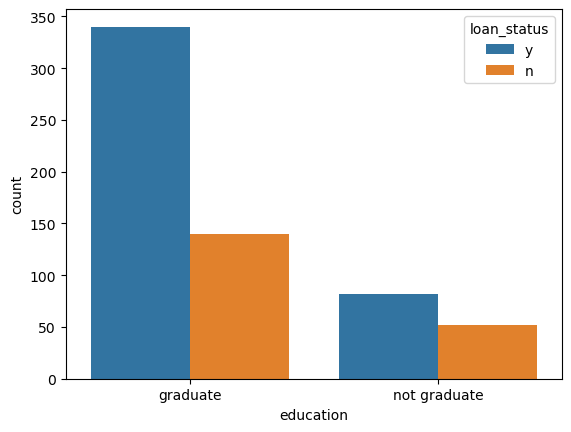

In [66]:
import seaborn as sns
sns.countplot(x='education', hue='loan_status', data=df)

<AxesSubplot:xlabel='married', ylabel='count'>

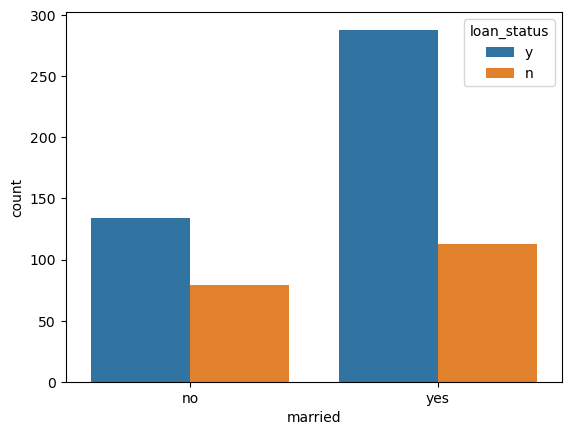

In [67]:
sns.countplot(x='married', hue='loan_status', data=df)

<AxesSubplot:xlabel='self_employed', ylabel='count'>

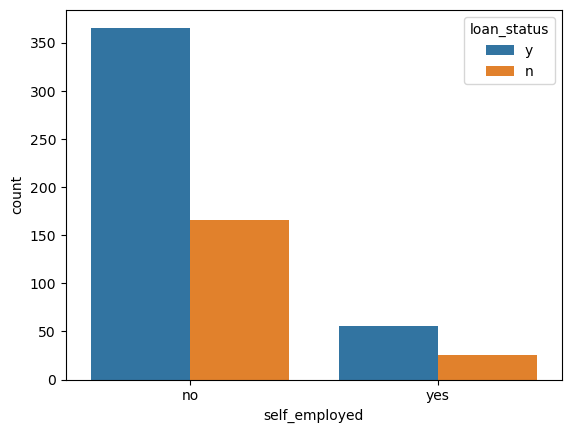

In [68]:
sns.countplot(x='self_employed', hue='loan_status', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

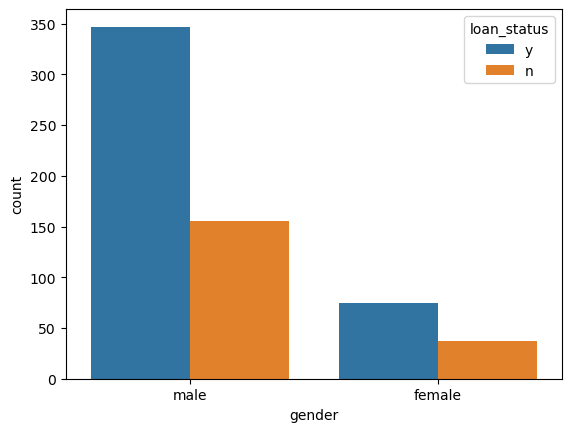

In [69]:
sns.countplot(x='gender', hue='loan_status', data=df)

<AxesSubplot:xlabel='property_area', ylabel='count'>

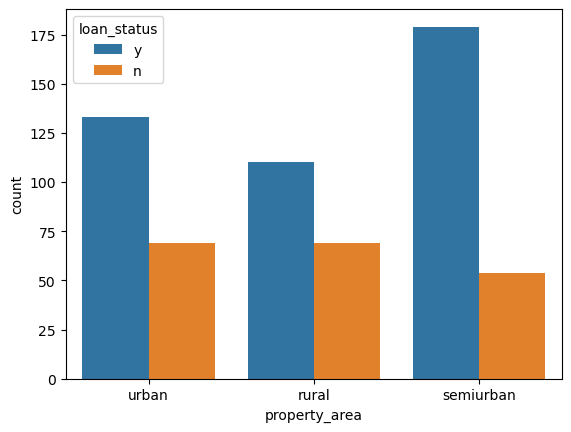

In [70]:
sns.countplot(x='property_area', hue='loan_status', data=df)

More Loans given to Self Employed Married Graduate Males having property at Semi Urban area having less dependents with high credit history.  

5. Encode the categorical data. (2)

In [71]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [74]:
label_encoder = LabelEncoder()
for i in df.select_dtypes('object'):
    df[i] = label_encoder.fit_transform(df[i])
    
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1


6. Separate the target and independent features and split the data into train and test. (2)

In [89]:
X = df.drop('loan_status', axis = 1)
Y = df['loan_status']

In [90]:
#split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state=1)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


In [91]:
## scaling the data using StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train.iloc[:,:])
X_test = ss.fit_transform(X_test.iloc[:,:])

7. Build any classification model to predict the loan status of the customer and save your model using pickle. (3)

In [96]:
# Random forest regressor
randf_agg = RandomForestRegressor()
randf_agg.fit(X_train,Y_train)

RandomForestRegressor()

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [100]:
Y_pred = model.predict(X_test)

Random Forest and Gradient Boost are giving 82.29% Accuracy

In [101]:
import pickle
pickle.dump(model, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))